In [176]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

ベースとなるタイプの分布を条件を満たすように作成する。 Kは2で割って奇数となるやつを選ぶこと。

これは状況1のシミュレーション

In [140]:
K = 14 # 後述するが、13グループということ
u_1 = 1
u_2 = 0.95
alpha = -2
const = (u_1- u_2)/alpha

q0 = 0.01
diff = (2/K - 2*q0)/(K/2 - 1)
dist = [q0 + diff*i for i in range(int(K/2))]
half_dist = dist[0::2]

In [141]:
def sigma_update(ind,d):
    return (d[ind+1] - sigma[ind] * d[ind] + const)/d[ind+1]

In [142]:
sigma = np.ones(len(half_dist))
for i in range(len(half_dist) - 1):
    sigma[i + 1] = sigma_update(i, half_dist)

In [143]:
sigma

array([ 1.        ,  0.31308411,  0.55440415,  0.42831541])

In [144]:
dist

[0.01,
 0.030476190476190476,
 0.05095238095238095,
 0.07142857142857142,
 0.09190476190476189,
 0.11238095238095237,
 0.13285714285714284]

In [145]:
const

-0.025000000000000022

In [146]:
diff

0.020476190476190474

In [155]:
# この時、事前の分布と移動後に実現する分布とを書いてみる
fullsigma = [1, 1, sigma[1], sigma[1], sigma[2], sigma[2], sigma[3]]
realized_dist = [dist[i]*fullsigma[i]+dist[i+1]*(1-fullsigma[i+1]) for i in range(6)]
realized_dist.append(dist[6]*fullsigma[6])

In [156]:
realized_dist

[0.01,
 0.065476190476190493,
 0.065017801513128623,
 0.063315531820204676,
 0.10102886750555143,
 0.13825684678016287,
 0.056904761904761875]

In [174]:
# 一番多いはずのところが少ない問題は、両側のグループがかぶさって存在することにして解決する
prior_dist = dist[0:int(K/2) -1] + [dist[int(K/2)-1]*2] + dist[::-1][1:int(K/2)]
posterior_dist = realized_dist[0:int(K/2) -1] + [realized_dist[int(K/2)-1]*2] + realized_dist[::-1][1:int(K/2)]

In [179]:
len(prior_dist)

13

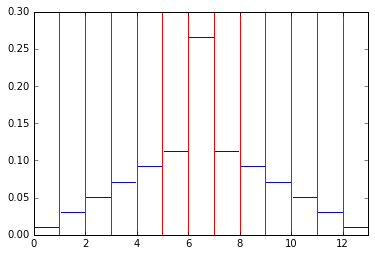

In [201]:
# 全員firstを選んだ時の分布
x = np.linspace(0,K, 200)
for i in range(0, K-1):
    plt.plot(x[(i<= x) & (x< i+1)], np.array([prior_dist[i]]*len(x[(i<= x) & (x< i+1)])), color = "blue")
    plt.axvline(x = i, color = "red")
plt.axvline(x = 13, color = "red")
plt.ylim(0,0.3)
plt.xlim(0,13)
plt.show()

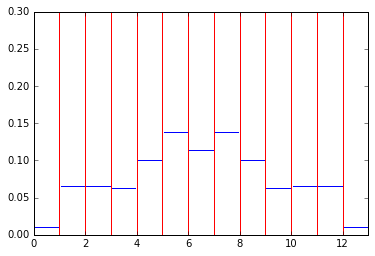

In [200]:
# 混合戦略ナッシュ均衡における乗車分布(かなり平準化されてる)
for i in range(0, K-1):
    plt.plot(x[(i<= x) & (x< i+1)], np.array([posterior_dist[i]]*len(x[(i<= x) & (x< i+1)])), color = "blue")
    plt.axvline(x = i, color = "red")
plt.axvline(x = 13, color = "red")
plt.ylim(0,0.3)
plt.xlim(0,13)
plt.show()

今は全員がfirstを選ぶのもナッシュ均衡を構成するケースを考えているので、上記の分布はどちらもナッシュ均衡として達成される。

しかし、下の分布では明らかに混雑が緩和されており、より好ましい状態であると言える。